# <center> <font color='blue'>Aluno:</font> Bruno Lima de Freitas <center>
# <center> <font color='blue'>Universidade:</font> Universidade Federal Fluminense (UFF) <center>
# <center> <font color='blue'>Disciplina :</font> Estágio Curricular Obrigatório I <center>
# <center> <font color='blue'>Orientador:</font> Rodrigo Bijani <center>
# <font color='red'>Objetivo do Trabalho:</font> Este trabalho consta em criar um modelo isostático 2D com o uso da linguaguem python (OPEN SOURCE) no ambiente jupyter notebook, com o objetivo de apresentar uma alternativa para a correção isostática, ou seja, uma correção para o efeito da raiz crustal sobre dados gravimétricos.

# <font color='green'>Etapa 1:</font> 
> Criar dados sintéticos que serão utilizados para gerar o relevo e consequentemente, a raiz crustal.

In [1]:
# Import das bibliotecas necessarias:
import sys # essa biblioteca está apenas relacionada com o uso das funções mostradas aqui pelo aluno e orientador eu seus computadores
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path referente aa localizacao do modulo:
#sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Gerando as informações para a função: (Parte 1)

# Coletando os limites em x e z do levantamento sintético:
nobs = 51 # número de pontos a serem considerados
zmin = 0.0 # limite mínimo em z do levantamento sintético em km
zmax = 20.0 # limite máximo em z do levantamento sintético em km
xmin = 0.0 # limite mínimo em x do levantamento sintético em km
xmax = 100.0 # limite máximo em x do levantamento sintético em km

In [4]:
# Gerando as informações para a função: (Parte 2)

# Definindo as coordenadas sinteticas do levantamento:
# Gerando valores para x:
x = np.linspace(xmin, xmax, nobs, endpoint=True)

# Gerando valores para z de forma que tenhamos algo próximo de uma gaussiana:
z = np.linspace(0, 0, nobs, endpoint=True)
aux = 3 # usada apenas para possibilitar a consideração de um relevo com pontos que estão ao nível de mar considerado
for i in range (nobs):
    if i < aux or (nobs - i) <= aux:
        z[i] = 0
    else:
        if (nobs - (2 * aux)) % 2 == 0:
            z_int = zmax / ((nobs/2) - aux)
            if i < (nobs/2):
                z[i] = - z_int * (i - aux + 1)
            else:
                z[i] = z[nobs - i - 1]
        else:
            z_int = zmax / ((nobs/2) + 0.5 - aux)
            if i < (nobs/2):
                z[i] = - z_int * (i - aux + 1)
            else:
                z[i] = z[nobs - i - 1]

# <font color='green'>Etapa 2:</font> 
> Produzir um plot que contenha o relevo e a raiz crustal associada. Será considerado um nível de compensação a 120 km de profundidade e para representar o relevo, uma gaussiana será utilizada. Essa gaussiana será gerada a partir dos dados sintéticos criados e por sua vez, eles já foram criados de forma que se aproximem de uma gaussiana mas de forma grosseira.

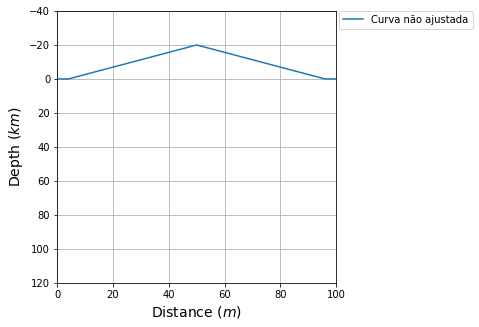

In [5]:
# Plotando uma curva com os dados sintéticos sem o ajuste com a gaussiana:
plt.figure( figsize=(5,5) ) # gerando a figura
plt.plot(x, z) # plotagem da curva
plt.xlim( [ x[0], x[nobs - 1]] ) # limites do eixo horizontal
plt.ylim(120, min(z) - 20) # limite do eixo vertical a ser ajustado quando for acrescentado o Moho
fs = 14 # tamanho da fonte para os labels
plt.ylabel('Depth $(km)$',fontsize=fs) # título do eixo vertical
plt.xlabel('Distance $(m)$',fontsize=fs) # título do eixo horizontal
plt.legend(['Curva não ajustada'], loc=9, 
           bbox_to_anchor=(0.75, .925, 1., .095), ncol=1) # legendas
plt.grid() # visualização das linhas do grid
plt.show() # visualização do plot

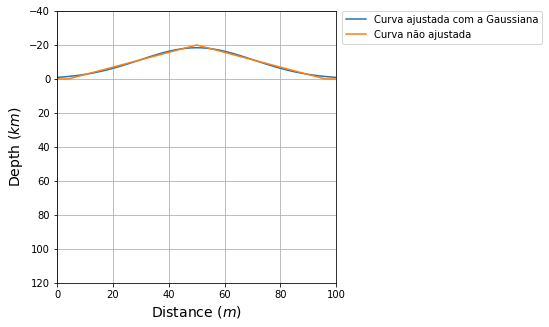

In [6]:
# Plotando a gaussiana produzida abaixo junto com a curva dos dados sintéticos:

# Biblioteca necessária para a produção da gaussiana:
from scipy.optimize import curve_fit

# Produzindo a gaussiana:
mean = sum(x*z)/sum(z)
sigma = np.sqrt(sum(z*(x - mean)**2)/sum(z))

def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

popt, pcov = curve_fit(gauss_function, x, z, p0 = [1, mean, sigma])

# Plotando as curvas:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt), label='fit') 
plt.plot(x, z)
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(120, min(z) - 20) # limite a ser ajustado quando for acrescentado o Moho
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Curva ajustada com a Gaussiana','Curva não ajustada'], loc=9, 
           bbox_to_anchor=(0.88, .925, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

In [7]:
# Gerando o vetor com as profundidades da descontinuidade de Moho:
ref = 120 # valor para o nível de compensação
moho = np.zeros(nobs)
for i in range (nobs):
    moho[i] = ref - z[i]

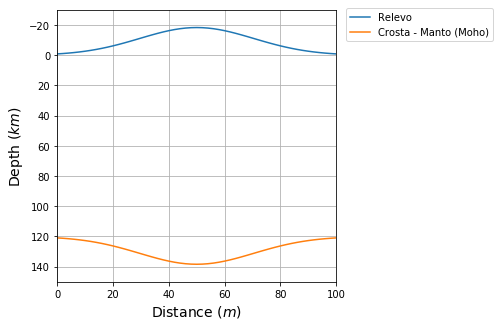

In [8]:
# Plotando o relevo representado pela gaussiana e a raiz crustal associada:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt), label='fit') # relevo
plt.plot(x, -gauss_function(x, *popt) + ref, label='fit') # moho
plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(max(moho) + 10, min(z) - 10)
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

# <font color='green'>Etapa 3:</font> 
> Associar massa a pontos em profundidade. Retângulos serão criados e usados para representar a crosta enquanto que diversos pontos individuais serão associados ao manto. Todos esses elementos serão associados a massas o que permitirá o cálculo de valores de gravidade.

# Dúvida
> Eu devo deixar "cálculo de valores de gravidade" acima ou o correto seria algo como o cálculo da anomalia.

In [9]:
# Gerando as coordenadas dos retângulos que serão acrescentados ao plot:
# Esses retângulos serão associados a uma determinada massa, gerando uma representação real de uma subsuperfície hipotética

# Definindo as coordenadas dos retângulos que serão plotados:
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) ) 
# o valor x_prisma será usado durante a etapa de visualização gráfica para a possibilizar a geração dos retangulos

x_plot = []
z_plot = []
for i in range(nobs): # construindo listas com todas as coordenadas x e z dos pontos que formam todos os retângulos
    x_plot.append( [ x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma ] )
    z_plot.append( [ 0, 0, ref - z[i], ref - z[i], 0 ] )

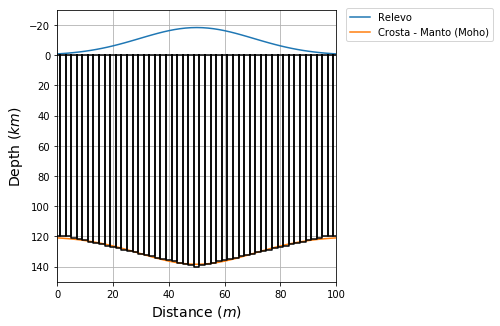

In [10]:
# Acrescentando os retângulos referentes a crosta ao nosso modelo de subsuperfície:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt), label='fit') # relevo
plt.plot(x, -gauss_function(x, *popt) + ref, label='fit') # moho

for i in range(nobs):
    plt.plot( x_plot[i], z_plot[i], "black") # visualização dos retângulos

plt.xlim( [ x[0], x[nobs - 1]] )
plt.ylim(max(moho) + 10, min(z) - 10)
fs = 14 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

# Dúvida:
> Coloco para os retângulos apresentarem a base de acordo com as medidas dadas para o relevo na superfície ou de acordo com a superfície gaussiana hipótetica criada para representar o moho?

In [11]:
# Produzindos diversos pontos
# Esses pontos irão formar uma malha de forma que parte da malha seja referente ao manto
# Produzindo as coordenadas desses pontos:
x_manto = np.linspace( x[0], x[nobs - 1], nobs, endpoint=True)
z_manto = np.linspace( 120, max(moho) + 10, nobs, endpoint=True) 
# o valor máximo de z_manto deve ser ajustado se a escala do eixo vertical do plot apresentado for alterada

# Produzindo uma malha:
X,Z = np.meshgrid( x_manto, z_manto)

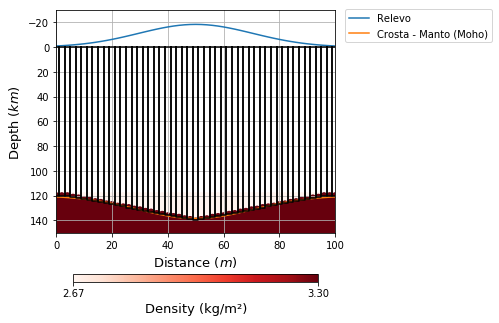

In [18]:
# Acrescentando os diversos pontos referentes ao manto:
plt.figure( figsize=(5,5) )
plt.plot(x, gauss_function(x, *popt), label='fit') # relevo
plt.plot(x, -gauss_function(x, *popt) + ref, label='fit') # moho

for i in range(nobs):
    plt.plot( x_plot[i], z_plot[i], "black") # visualização dos retângulos

col = np.copy(Z)
for i in range (Z.shape[0]):
    for j in range (Z.shape[1]):
        if col[j,i] >= moho[i]:
            col[j,i] = 3.3
        else:
            col[j,i] = 2.670

plt.scatter(X, Z, c=col, cmap='Reds')
cbar = plt.colorbar(aspect=30, fraction=0.03, orientation='horizontal', ticks=[2.670, 3.3])
cbar.set_label('Density (kg/m²)', fontsize=13, rotation=0)

plt.xlim( [ x[0] , x[nobs - 1]] )
plt.ylim(max(moho) + 10, min(z) - 10)
fs = 13 # font size for the label
plt.ylabel('Depth $(km)$',fontsize=fs)
plt.xlabel('Distance $(m)$',fontsize=fs)
plt.legend(['Relevo','Crosta - Manto (Moho)'], loc=9, 
           bbox_to_anchor=(0.8, .93, 1., .095), ncol=1) # legendas
plt.grid()
plt.show()

# Dúvidas:
> Desconsidero a função fornecida pelo professor?

In [ ]:
def gaussian2d(x, z, sigma_x, sigma_z, x0=0, z0=0, angle=0.0):
    """
    Non-normalized 2D Gaussian function

    Parameters:

    * x, y : float or arrays
        Coordinates at which to calculate the Gaussian function
    * sigma_x, sigma_y : float
        Standard deviation in the x and y directions
    * x0, y0 : float
        Coordinates of the center of the distribution
    * angle : float
        Rotation angle of the gaussian measure from the x axis (north) growing
        positive to the east (positive y axis)

    Returns:

    * gauss : array
        Gaussian function evaluated at *x*, *y*

    """
    theta = -1 * angle * np.pi / 180.
    tmpx = 1. / sigma_x ** 2
    tmpz = 1. / sigma_z ** 2
    sintheta = np.sin(theta)
    costheta = np.cos(theta)
    a = tmpx * costheta + tmpz * sintheta ** 2
    b = (tmpz - tmpx) * costheta * sintheta
    c = tmpx * sintheta ** 2 + tmpz * costheta ** 2
    xhat = x - x0
    zhat = z - z0
    return np.exp(-(a * xhat ** 2 + 2. * b * xhat * zhat + c * zhat ** 2))